In [92]:
from pandas import *
from wordcloud import WordCloud
import seaborn as sns

In [3]:
df = read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [4]:
df.shape

(5000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
id                     5000 non-null object
dateAdded              5000 non-null object
dateUpdated            5000 non-null object
name                   5000 non-null object
asins                  5000 non-null object
brand                  5000 non-null object
categories             5000 non-null object
primaryCategories      5000 non-null object
imageURLs              5000 non-null object
keys                   5000 non-null object
manufacturer           5000 non-null object
manufacturerNumber     5000 non-null object
reviews.date           5000 non-null object
reviews.dateAdded      1052 non-null object
reviews.dateSeen       5000 non-null object
reviews.doRecommend    5000 non-null bool
reviews.id             29 non-null float64
reviews.numHelpful     5000 non-null int64
reviews.rating         5000 non-null int64
reviews.sourceURLs     5000 non-null object
reviews.text      

In [7]:
new_df = df[["id","reviews.text","reviews.rating"]]
new_df.head()

,id,reviews.text,reviews.rating
0,AVqVGZNvQMlgsOJE6eUY,I thought it would be as big as small paper bu...,3
1,AVqVGZNvQMlgsOJE6eUY,This kindle is light and easy to use especiall...,5
2,AVqVGZNvQMlgsOJE6eUY,Didnt know how much i'd use a kindle so went f...,4
3,AVqVGZNvQMlgsOJE6eUY,I am 100 happy with my purchase. I caught it o...,5
4,AVqVGZNvQMlgsOJE6eUY,Solid entry level Kindle. Great for kids. Gift...,5


In [12]:
new_df['reviews.rating'].value_counts()

5    3478
4    1208
3     197
1      63
2      54
Name: reviews.rating, dtype: int64

In [14]:
new_df.describe(include=["O"])

,id,reviews.text
count,5000,5000
unique,24,4385
top,AVqkIhwDv8e3D1O-lebb,I bought this kindle for my 11yr old granddaug...
freq,797,4


In [17]:
rt = new_df["reviews.text"]

In [21]:
wordcloud = WordCloud(background_color='white',width=1000,height=400).generate(" ".join(rt))

In [19]:
plt.figure(figsize=(10,5))

<IPython.core.display.Javascript object>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<IPython.core.display.Javascript object>

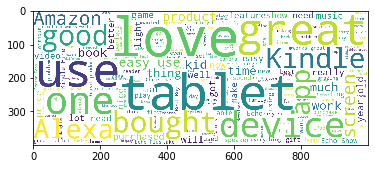

In [22]:
plt.imshow(wordcloud)

In [24]:
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

In [27]:
rt = " ".join(new_df['reviews.text'])

In [31]:
new_df['reviews.text'].mode()

0    A little more complicated than my original kin...
1    Bought this mostly as a backup.and to read a f...
2    Got this for my Daughter-in-Law and she loves ...
3    I bought this kindle for my 11yr old granddaug...
4    This was a Christmas present. The person that ...
dtype: object

In [41]:
sp = rt.split(" ")

In [42]:
store = {}
diz = {}

In [51]:
diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1
        

In [52]:
diz

{'happy': 149,
 'love': 777,
 'awesome': 70,
 'great': 878,
 'amazing': 56,
 'fantastic': 22,
 'super': 40,
 'glad': 28,
 'disappointed': 20,
 'satisfied': 28,
 'wow': 2,
 'hate': 6,
 'regret': 7,
 'bad': 27,
 'wonderful': 22,
 'pleased': 44,
 'lucky': 3,
 'impressive': 2,
 'content': 27,
 'annoyed': 4,
 'sad': 1,
 'terrible': 3,
 'upset': 1}

In [69]:
c = ("my name iss sana sana")
c1 = c.split(" ")
c1
c2 = {}
print(c2.get('sana'))


None


In [73]:
sp.count('upset')

1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

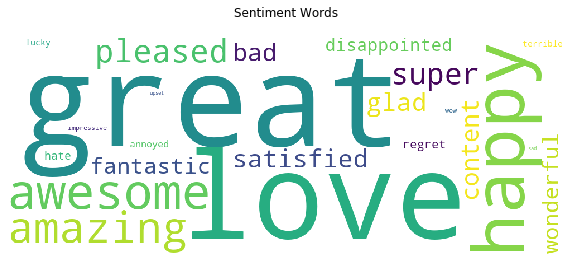

In [91]:
wordcolud = WordCloud(background_color = 'white', width = 2000 , height = 1000).generate_from_frequencies(diz)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud)
plt.title('Sentiment Words\n')
plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>

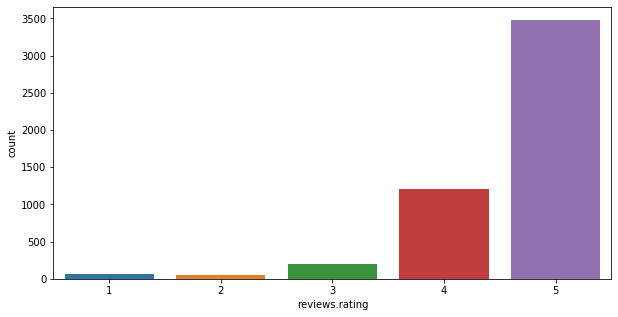

In [96]:
plt.figure(figsize = (10,5))
sns.countplot(new_df['reviews.rating'])

In [109]:
data1 = new_df.groupby("id").mean().reset_index()
data1

,id,reviews.rating
0,AV-XeQLWuC1rwyj_gbP5,5.000000
1,AVpfIfGA1cnluZ0-emyp,4.863636
2,AVpfpK8KLJeJML43BCuD,4.506667
3,AVpftoij1cnluZ0-p5n2,4.818182
4,AVpgdkC8ilAPnD_xsvyi,4.460916
5,AVph0EeEilAPnD_x9myq,4.577540
6,AVphPmHuilAPnD_x3E5h,4.646341
7,AVpidLjVilAPnD_xEVpI,4.669811
8,AVpjEN4jLJeJML43rpUe,4.509636
9,AVqVGWLKnnc1JgDc3jF1,4.516129


In [111]:
data1 = data1.sort_values(['reviews.rating']).reset_index()
data1

,level_0,index,id,reviews.rating
0,0,16,AVqkIh9HQMlgsOJE6fu_,4.400000
1,1,11,AVqVGZNvQMlgsOJE6eUY,4.406250
2,2,4,AVpgdkC8ilAPnD_xsvyi,4.460916
3,3,2,AVpfpK8KLJeJML43BCuD,4.506667
4,4,20,AVqkIj9snnc1JgDc3khU,4.509434
5,5,8,AVpjEN4jLJeJML43rpUe,4.509636
6,6,14,AVqkIdZiv8e3D1O-leaJ,4.514851
7,7,9,AVqVGWLKnnc1JgDc3jF1,4.516129
8,8,5,AVph0EeEilAPnD_x9myq,4.577540
9,9,13,AVqVGZSEQMlgsOJE6eUc,4.584906


<IPython.core.display.Javascript object>

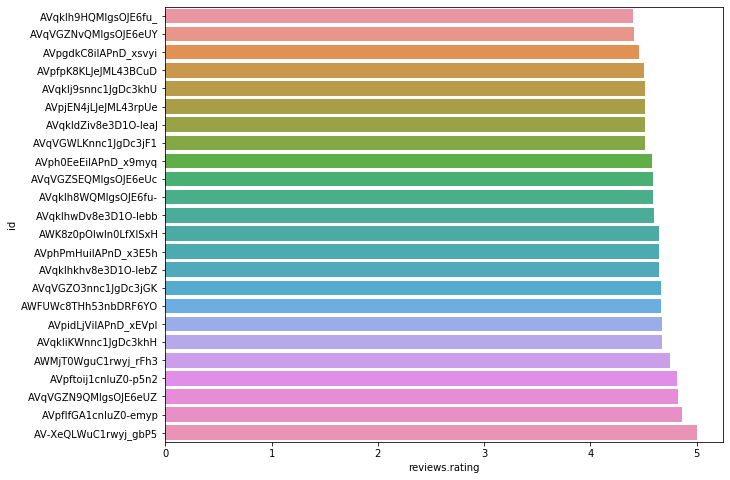

In [114]:
plt.figure(figsize = (10,8))
sns.barplot(x = data1['reviews.rating'],y = data1['id'])
